# <center>Fundamentals for Data Analysis Assignment </center>

This Jupyter notebook is based on the Seaborn Tips dataset.

#### About the Tips Dataset

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay. In one restaurant, a food server recorded the following data on all cus- tomers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law, the restaurant offered to seat in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s work schedule.

The Tips dataset contains the following parameters
1. total bill
2. tip
3. sex
4. smoker
5. day
6. day
7. time
8. size

I will be analysing to see if there is a relationship between the different variables of the dataset.


The main variables i want to analyse are
##### 1. Total bill and tip given

I want to see what is the average percent tip that people at this restaurant give, if they round off there bill to a whole number.

#### 2. Total bill and the sex of the person paying

I want to see what sex pays for Lunch/Dinner to see if they are evenly split between males and females or if it is mainly a single sex. 

#### 3. Sex of the person paying and the tip given

To see if males or females give larger percent tip in relation to the total bill, The percentage tip given is the better way to measure as if calculate who gave the larger tip it would be inaccurate as the larger tip would be given with the more expensive meal so thats why percentage tip over the total bill would be more accurate.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
sns.set(style="darkgrid")
tips = sns.load_dataset("tips") # Load the Dataset

## <font color='red'>Tips Dataset Parameters</font>

In [2]:
tips #Print the tips dataset

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


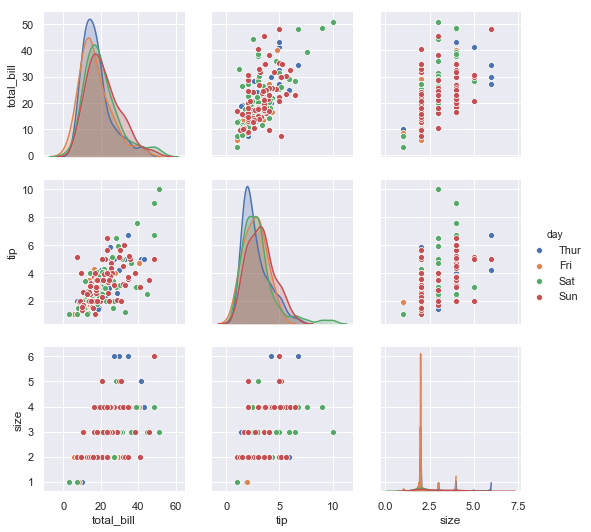

In [41]:
sns.pairplot(data=tips, hue="day") # Pairplot of the variables total_bill, tip and size on each day

-------------------------------------------------------------------------------------------------------------------------------
## <font color='red'>The relationship between the total bill and the tip given</font>

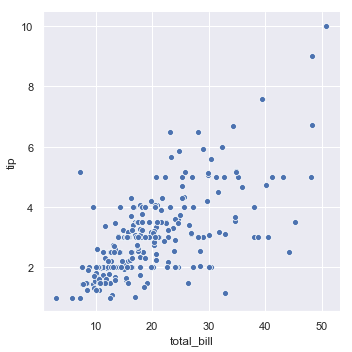

In [3]:
sns.relplot(x="total_bill", y="tip", data=tips); #Plot the tips vatiables total_bill vs tip

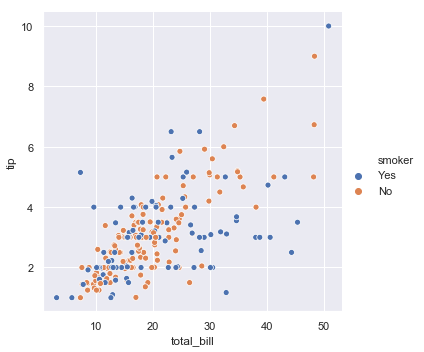

In [4]:
#Plot the tips vatiables total_bill vs tip, with a different color for smokers
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips); 

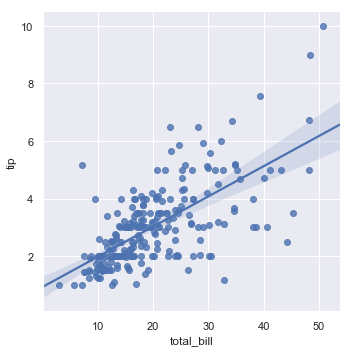

In [25]:
sns.lmplot(x="total_bill", y="tip", data=tips)

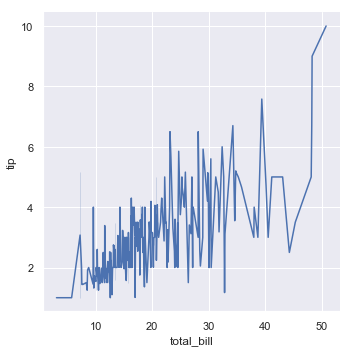

In [37]:
sns.relplot('total_bill', 'tip', data=tips, kind='line')

The two graphs aboves show the correlation between the total_bill and the tips given, With the second one showing the smokers and non smokers. It is clear that there is no difference in the tip given by a smoker or a non smoker

From having a quick look at the graphs you can see that the majority of people had a total bill of between 10-25 and gave a tip between 2-4

### What percentage of people rounded off their bill to a whole number?

In [5]:
with open("tips.csv",'r') as df: #open the tips csv file
    count=0
    num = 0
    bills = 0
    reader = csv.reader(df, delimiter=',')
    for row in reader:
        bills = bills+1
        if count > 0:
            total = float(row[0])+float(row[1])
            if str(total).endswith(".0"):
                num=num+1
                #print(round(total,2), "  NUMBERS:",row[0],"TIPS:",row[1],"*******")
            else:continue
                #print(round(total,2), "  NUMBERS:",row[0],"TIPS:",row[1])
        else:
            count = count+1
    print()
    print(str(round((num/(bills-1))*100,2))+"% or",num, "tables out of",bills-1,"for that day rounded their bill to a whole number")


24.59% or 60 tables out of 244 for that day rounded their bill to a whole number


### What percentage tips did people give on average?

In [6]:
with open("tips.csv",'r') as df: #Open the tips csv file
    count=0
    tipLow = 0
    maleLow = 0
    femaleLow = 0
    tipMed = 0
    maleMed = 0
    femaleMed = 0
    tipHigh = 0
    maleHigh = 0
    femaleHigh = 0
    reader = csv.reader(df, delimiter=',')
    for row in reader:
        if count > 0:
            count = count+1
            total = (float(row[1])/float(row[0]))*100
            if total >0 and total< 11:
                tipLow = tipLow+1
                if row[2] == "Male":maleLow=maleLow+1
                elif row[2] == "Female":femaleLow=femaleLow+1
            elif total >10 and total< 20:
                tipMed= tipMed+1
                if row[2] == "Male":maleMed=maleMed+1
                elif row[2] == "Female":femaleMed=femaleMed+1
            else:
                tipHigh = tipHigh+1
                if row[2] == "Male":maleHigh=maleHigh+1
                elif row[2] == "Female":femaleHigh=femaleHigh+1
        else:
            count = count+1
    
    #print(tipLow," ",tipMed," ",tipHigh)
    
    data = {'Tip averages':['','Total Tables'],'0-10%':[tipLow,count-1],' 10-20%':[tipMed,''],' >20%':[tipHigh,'']}
 
    # Create DataFrame
    df = pd.DataFrame(data)
    print(df)
    


   Tip averages  0-10%  10-20%  >20%
0                   39     166    39
1  Total Tables    244              


<BarContainer object of 3 artists>

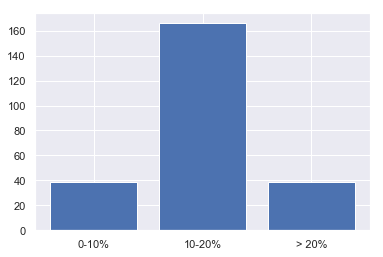

In [7]:
percentages = ["0-10%","10-20%","> 20%"]
values = [tipLow,tipMed,tipHigh]

plt.bar(percentages,values)

In [8]:
print(maleLow,"males and",femaleLow,"females gave a tip between 0-10%")
print(maleMed,"males and",femaleMed,"females gave a tip between 10-20%")
print(maleHigh,"males and",femaleHigh,"females gave a tip greater than 20%")


32 males and 7 females gave a tip between 0-10%
101 males and 65 females gave a tip between 10-20%
24 males and 15 females gave a tip greater than 20%


-------------------------------------------------------------------------------------------------------------------------------
## <font color='red'>Sex variable and how it related to the tip given</font>
-------------------------------------------------------------------------------------------------------------------------------

The next variable i am going to look at is the sex variable. since there is many diffrent group sizes and since it does not state how many men and how many women are in the group i am going to take that the sex that is marked in the tips dataset is the sex of the person paying the bill.

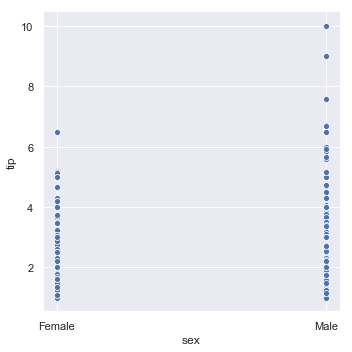

In [9]:
sns.relplot(x="sex", y="tip", data=tips); #Plot of sex vs tip

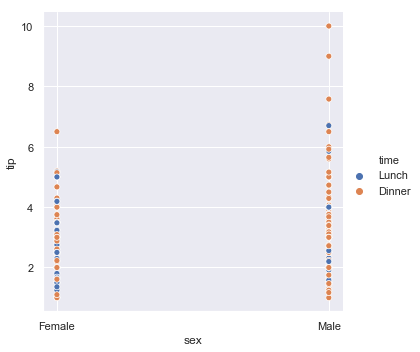

In [10]:
#Plot of sex vs tip with a different colour for the time of day
sns.relplot(x="sex", y="tip", hue="time" ,data=tips); 

From the above two graphs we can see that the tips are relatively split between the men and the women with the exception of a few tips between the 6-10 area given by the men. 
In the second graph just by looking we can estimate that lunch was mainly paid by Females with the blue dots and that Dinner was paid mainly by men with the orange dots.

In the next cell i will calculate the percentages of each meal paid by males and females.

In [11]:
with open("tips.csv",'r') as df:
    FLunch = 0
    FDinner = 0
    MLunch = 0
    MDinner = 0
    reader = csv.reader(df, delimiter=',')
    for row in reader:
        if row[2] == "Female" and row[5] == "Dinner":
            FDinner = FDinner +1
        elif row[2] == "Female" and row[5] == "Lunch":
            FLunch = FLunch +1
        elif row[2] == "Male" and row[5] == "Dinner":
            MDinner = MDinner +1
        elif row[2] == "Male" and row[5] == "Lunch":
            MLunch = MLunch +1
        else:
            continue
    DinPercent = (FDinner/(FDinner + MDinner))*100
    LunPercent = (FLunch/(FLunch + MLunch))*100
    print(str(int(round(LunPercent,0)))+"%","of lunch was paid by Females with the remaining",str(int (100-round(LunPercent)))+"% being paid by Males")
    print(str(int(round(DinPercent,0)))+"%","of Dinner was paid by Females with the remaining",str(int(100-round(DinPercent)))+"% being paid by Males")

51% of lunch was paid by Females with the remaining 49% being paid by Males
30% of Dinner was paid by Females with the remaining 70% being paid by Males


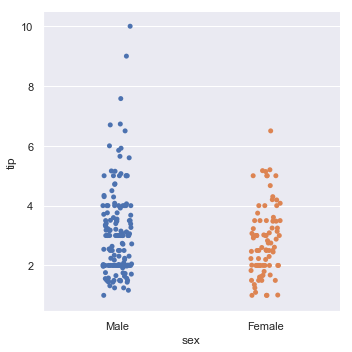

In [12]:
sns.catplot(x="sex", y="tip", data=tips)

From calculating the lunch and dinner slots it shows that 51% of Females paid for lunch and 70% of Males paid for dinner.

There is a smaller gap than origionally thought between the males and females paying for lunch with only 2% difference. But from the graph it was clear that the Males mainly paid for dinner and that is now proven by the above calculations

-------------------------------------------------------------------------------------------------------------------------------
## <font color='red'>Tip given in relation to the Day</font>

C:\ProgrammingApps\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


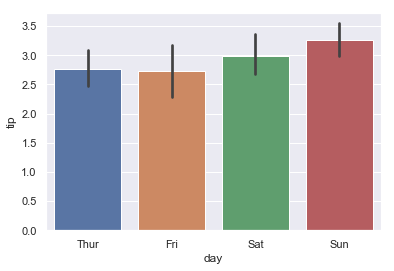

In [13]:
#Barchart of the total tips for each day
sns.barplot(x="day", y="tip", data=tips);

From the graph above the highest days for tips were Saturday and Sunday, This would be expected as the restaurant would be busier at the weekend compared to a weekday

In [14]:
with open("tips.csv",'r') as df:
    total_tips = 0.0
    count=0
    tipthurs,lunThur,dinThur=0.0,0.0,0.0
    tipFri,lunFri,dinFri=0.0,0.0,0.0
    tipSat,lunSat,dinSat=0.0,0.0,0.0
    tipSun,lunSun,dinSun=0.0,0.0,0.0
    
    reader = csv.reader(df, delimiter=',')
    for row in reader:
        if count > 0:
            total_tips = total_tips + float(row[1])
            count=count+1
            if row[4] == "Thur":
                tipthurs=tipthurs+ float(row[1])
                if row[5]== "Dinner":dinThur=dinThur+float(row[1])
                elif row[5]=="Lunch":lunThur=lunThur+float(row[1])
            elif row[4] == "Fri":
                tipFri=tipFri+ float(row[1])
                if row[5]== "Dinner":dinFri=dinFri+float(row[1])
                elif row[5]=="Lunch":lunFri=lunFri+float(row[1])
            elif row[4] == "Sat":
                tipSat=tipSat+ float(row[1])
                if row[5]== "Dinner":dinSat=dinSat+float(row[1])
                elif row[5]=="Lunch":lunSat=lunSat+float(row[1])
            elif row[4] == "Sun":
                tipSun=tipSun+ float(row[1])
                if row[5]== "Dinner":dinSun=dinSun+float(row[1])
                elif row[5]=="Lunch":lunSun=lunSun+float(row[1])
            
        else:
            count = count+1
    print("Total tips from Thurday to Sunday is",total_tips)
    print("Thursdays tips were total: ",tipthurs)
    print("     Lunch:",lunThur)
    print("     Dinner:",dinThur)
    print("Fridays tips were total: ",tipFri)
    print("     Lunch:",lunFri)
    print("     Dinner:",dinFri)
    print("Saturdays tips were total: ",round(tipSat,2))
    print("     Lunch:",lunSat)
    print("     Dinner:",round(dinSat,2))
    print("Sundays tips were total: ",round(tipSun,2))
    print("     Lunch:",lunSun)
    print("     Dinner:",round(dinSun,2))
    

Total tips from Thurday to Sunday is 731.58
Thursdays tips were total:  171.83
     Lunch: 168.83
     Dinner: 3.0
Fridays tips were total:  51.96
     Lunch: 16.68
     Dinner: 35.28
Saturdays tips were total:  260.4
     Lunch: 0.0
     Dinner: 260.4
Sundays tips were total:  247.39
     Lunch: 0.0
     Dinner: 247.39


In [27]:
tips.groupby('time').sum()

,total_bill,tip,size
time,,,
Lunch,1167.47,185.51,164
Dinner,3660.30,546.07,463


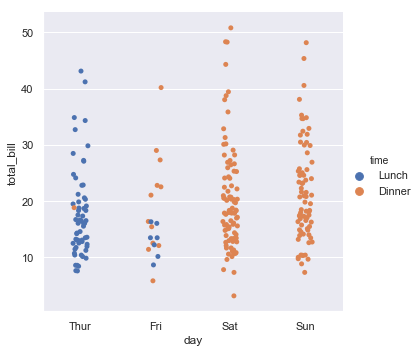

In [15]:
#plot a graph with what time people came to the restaurant
sns.catplot(x="day", y="total_bill", hue='time', data=tips) 

After analysing the data of the tips given on each day i have come to some conclusions
1. This restaurant does not open for lunch on Saturday and Sunday as no tip is given and no table is marked
2. This restaurant is located in a central location as Lunch tips on Thursdday are high
3. People in the working industry tend to get paid on a thurday so this may result to them eating our for lunch

## <font color='red'>Total bill and Tip in relation to Size of the group</font>

### Average bill price per person

In [16]:
with open("tips.csv",'r') as df:
    rowCount=0
    TotalSize=0
    overallTotalBill = 0.0
    AvgPerPerson = 0.0
    reader = csv.reader(df, delimiter=',')
    for row in reader:
        if rowCount>0:
            TotalSize = TotalSize+ int(row[6])
            overallTotalBill= overallTotalBill + float(row[0])
        else:
            rowCount = rowCount+1
            
    AvgPerPerson = overallTotalBill/TotalSize
    print("The Average price per person is $"+str(round(AvgPerPerson,2)))

The Average price per person is $7.7


### What Group Sizes gave the best tip

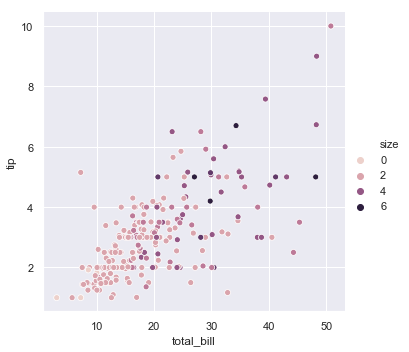

In [17]:
# Scatter plot of total_bill vs tips with table size a different colour
sns.relplot(x="total_bill", y="tip",hue="size", data=tips); 

Above is a scatter plot of the total_bill on the X-axis and the tip on the Y-axis, The Index shows what size group was in the restaurant

In [18]:
with open("tips.csv",'r') as df:
    count=0
    SizeTwoLow,SizeThreeLow,SizeFourLow,SizeFiveLow,SizeSixLow = 0,0,0,0,0
    SizeTwoMed,SizeThreeMed,SizeFourMed,SizeFiveMed,SizeSixMed = 0,0,0,0,0
    SizeTwoHigh,SizeThreeHigh,SizeFourHigh,SizeFiveHigh,SizeSixHigh = 0,0,0,0,0
    reader = csv.reader(df, delimiter=',')
    for row in reader:
        if count > 0:
            count = count+1
            total = (float(row[1])/float(row[0]))*100
            if total >0 and total< 11:
                if row[6] == "2":SizeTwoLow=SizeTwoLow+1
                elif row[6] == "3":SizeThreeLow=SizeThreeLow+1
                elif row[6] == "4":SizeFourLow=SizeFourLow+1
                elif row[6] == "5":SizeFiveLow=SizeFiveLow+1
                else:SizeSixLow=SizeSixLow+1
            elif total >10 and total< 20:
                if row[6] == "2":SizeTwoMed=SizeTwoMed+1
                elif row[6] == "3":SizeThreeMed=SizeThreeMed+1
                elif row[6] == "4":SizeFourMed=SizeFourMed+1
                elif row[6] == "5":SizeFiveMed=SizeFiveMed+1
                else:SizeSixMed=SizeSixMed+1
            else:
                if row[6] == "2":SizeTwoHigh=SizeTwoHigh+1
                elif row[6] == "3":SizeThreeHigh=SizeThreeHigh+1
                elif row[6] == "4":SizeFourHigh=SizeFourHigh+1
                elif row[6] == "5":SizeFiveHigh=SizeFiveHigh+1
                else:SizeSixHigh=SizeSixHigh+1
                
        else:
            count = count+1
    TotalTwo = SizeTwoLow+SizeTwoMed+SizeTwoHigh
    TotalThree = SizeThreeLow+SizeThreeMed+SizeThreeHigh
    TotalFour = SizeFourLow+SizeFourMed+SizeFourHigh
    TotalFive = SizeFiveLow+SizeFiveMed+SizeFiveHigh
    TotalSix = SizeSixLow+SizeSixMed+SizeSixHigh
    
    print("Percentages of each Group")
    print("         0-10%  10-20%   >20%")
    
    TipTwoLowPerc = float((SizeTwoLow/TotalTwo)*100)
    TipTwoMedPerc = float((SizeTwoMed/TotalTwo)*100)
    TipTwoHighPerc = float((SizeTwoHigh/TotalTwo)*100)
    print("Size 2:  ",round(TipTwoLowPerc),"    ",round(TipTwoMedPerc),"    ",round(TipTwoHighPerc))
    
    TipThreeLowPerc = float((SizeThreeLow/TotalThree)*100)
    TipThreeMedPerc = float((SizeThreeMed/TotalThree)*100)
    TipThreeHighPerc = float((SizeThreeHigh/TotalThree)*100)
    print("Size 3:  ",round(TipThreeLowPerc),"    ",round(TipThreeMedPerc),"    ",round(TipThreeHighPerc))
    
    TipFourLowPerc = float((SizeFourLow/TotalFour)*100)
    TipFourMedPerc = float((SizeFourMed/TotalFour)*100)
    TipFourHighPerc = float((SizeFourHigh/TotalFour)*100)
    print("Size 4:  ",round(TipFourLowPerc),"    ",round(TipFourMedPerc),"    ",round(TipFourHighPerc))
    
    TipFiveLowPerc = float((SizeFiveLow/TotalFive)*100)
    TipFiveMedPerc = float((SizeFiveMed/TotalFive)*100)
    TipFiveHighPerc = float((SizeFiveHigh/TotalFive)*100)
    print("Size 5:  ",round(TipFiveLowPerc),"    ",round(TipFiveMedPerc),"    ",round(TipFiveHighPerc))
     
    TipSixLowPerc = float((SizeSixLow/TotalSix)*100)
    TipSixMedPerc = float((SizeSixMed/TotalSix)*100)
    TipSixHighPerc = float((SizeSixHigh/TotalSix)*100)
    print("Size 6:  ",round(TipSixLowPerc),"    ",round(TipSixMedPerc),"    ",round(TipSixHighPerc))

Percentages of each Group
         0-10%  10-20%   >20%
Size 2:   14      67      19
Size 3:   18      68      13
Size 4:   19      76      5
Size 5:   40      40      20
Size 6:   12      62      25


From the above table where the percentage tip is calculated in relation to the total bill,
25% of tables with a group size of 6 gave a tip greater than 20%
Tables of 4 gave the highest in the range between 10-20% but the lowest overall in relation to tips above 20%

For the staff members the best group sizes that they wish to see are groups of 2 and 6 as there is the best chance of a high tip

## <font color='red'>Smoking and the time of the day</font>

In [19]:
tips [["sex","time", "smoker"]] #Print tips columns sex,time and smoker

,sex,time,smoker
0,Female,Dinner,No
1,Male,Dinner,No
2,Male,Dinner,No
3,Male,Dinner,No
4,Female,Dinner,No
5,Male,Dinner,No
6,Male,Dinner,No
7,Male,Dinner,No
8,Male,Dinner,No
9,Male,Dinner,No


In [20]:
tips.groupby(by='smoker').size() #number of people that smoked

smoker
Yes     93
No     151
dtype: int64

In [21]:
with open("tips.csv",'r') as df:
    rowCount=0
    smokerLunch,smokerDinner = 0,0
    reader = csv.reader(df, delimiter=',')
    for row in reader:
        if rowCount>0:
            if row[3] == "Yes":
                if row[5] == "Lunch":
                    smokerLunch=smokerLunch+1
                else:
                    smokerDinner=smokerDinner+1
            elif row[3] == "No":
                continue
                
        else:
            rowCount = rowCount+1
            
    print("Smokers at Lunch: ",smokerLunch)
    print("Smokers at Dinner: ",smokerDinner)

Smokers at Lunch:  23
Smokers at Dinner:  70


In [22]:
tips.groupby(by='time').size() #Calculate how many tables at lunch and dinner

time
Lunch      68
Dinner    176
dtype: int64

In [23]:
percSmokerLun = (smokerLunch/68)*100
percSmokerDin = (smokerDinner/176)*100

print(str(round(percSmokerLun,2))+"% Of tables smoked at Lunch")
print(str(round(percSmokerDin,2))+"% Of tables smoked at Dinner")

33.82% Of tables smoked at Lunch
39.77% Of tables smoked at Dinner


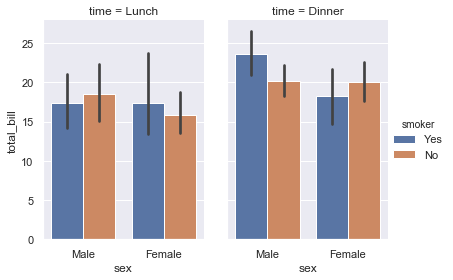

In [24]:
sns.catplot(x="sex", y="total_bill",
...                 hue="smoker", col="time",
...                 data=tips, kind="bar",
...                 height=4, aspect=.7);

## References

- https://www.anaconda.com/distribution/
- https://github.com/mwaskom/seaborn-data/blob/master/tips.csv
- https://seaborn.pydata.org/
- https://www.kaggle.com/ranjeetjain3/seaborn-tips-dataset
- https://seaborn.pydata.org/generated/seaborn.barplot.html